<a href="https://colab.research.google.com/github/sandraoktavia/Praktikum_AI_Workflow/blob/main/Sandra_Oktavia_Tugas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **DATASET giars_collections**

## Mengimport dataset

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split  # ✅ Import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Membaca dataset dengan delimiter ';'
df = pd.read_csv('giars_collections.csv', delimiter=';')

##Mengecek data yang hilang

In [137]:
print(df.isnull().values.any())


False


In [138]:
print("\nInfo Dataset:")
print(df.info())


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tanggal         10 non-null     object
 1   Produk          10 non-null     object
 2   Jumlah Terjual  10 non-null     int64 
 3   Stok            10 non-null     int64 
 4   Harga Satuan    10 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 532.0+ bytes
None


##Menambah data yang hilang

In [139]:
df['Tanggal'].fillna('13/10/2024', inplace=True)
df['Tanggal'].fillna('13/10/2024', inplace=True)
df['Tanggal'].fillna('14/10/2024', inplace=True)
df['Tanggal'].fillna('15/10/2024', inplace=True)
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y', errors='coerce')


<ipython-input-139-7bdae433c10a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tanggal'].fillna('13/10/2024', inplace=True)
<ipython-input-139-7bdae433c10a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

##Mengkonversi tanggal menjadi date time

In [140]:
 print("5 Data Teratas:")
 print(df.head())

5 Data Teratas:
     Tanggal    Produk  Jumlah Terjual  Stok  Harga Satuan
0 2024-10-09       Tas               3    25        150000
1 2024-10-09      Baju               7   100         85000
2 2024-10-10  Kerudung               8    60         40000
3 2024-10-11    Celana              11   100        105000
4 2024-10-12    Sepatu               2    20        250000


## Tambah kolom Total Terjual dan Keuntungan

In [141]:
def tambah_kolom(df):
  df['Total Terjual'] = df['Jumlah Terjual'] * df['Harga Satuan']
  df['Keuntungan'] = (df['Jumlah Terjual'] * df['Harga Satuan']) - (df['Jumlah Terjual'] * 10000)
  return df
df = tambah_kolom(df)

## menampilkan dataset terbaru

In [142]:

print(df)

     Tanggal      Produk  Jumlah Terjual  Stok  Harga Satuan  Total Terjual  \
0 2024-10-09         Tas               3    25        150000         450000   
1 2024-10-09        Baju               7   100         85000         595000   
2 2024-10-10    Kerudung               8    60         40000         320000   
3 2024-10-11      Celana              11   100        105000        1155000   
4 2024-10-12      Sepatu               2    20        250000         500000   
5 2024-10-12      Gesper               1    15         15000          15000   
6 2024-10-13        Topi               5     5         17000          85000   
7 2024-10-13       Gamis               4    38         85000         340000   
8 2024-10-14   Kaos Kaki               3    25         10000          30000   
9 2024-10-15  Jam Tangan               4     8         75000         300000   

   Keuntungan  
0      420000  
1      525000  
2      240000  
3     1045000  
4      480000  
5        5000  
6       35000  
7 

## menentukan produk perlu di restock atau tidak

In [157]:
df['Restock'] = df['Stok'].apply(lambda x: 1 if x < 5 else 0)


In [156]:
# Memilih fitur (X) dan target (y)
X = df[['Jumlah Terjual', 'Stok']]
y = df['Restock']


Data Fitur dat Target (contoh 5 data)

In [145]:
print("\nCData Fitur (X):")
print(X.head())

print("\n Data Target (y):")
print(y.head())



Contoh Data Fitur (X):
   Jumlah Terjual  Stok
0               3    25
1               7   100
2               8    60
3              11   100
4               2    20

Contoh Data Target (y):
0    0
1    0
2    0
3    0
4    0
Name: Restock, dtype: int64


## Menampilkan distribusi data restock

In [153]:
# Menampilkan beberapa data awal setelah kolom 'Restock' ditambahkan
print("\nData setelah menambahkan kolom 'Restock':")
print(df[['Stok', 'Restock']].head(10))

# Menampilkan distribusi data restock
print("\nDistribusi Restock (0 = Tidak perlu restock, 1 = Perlu restock):")
print(df['Restock'].value_counts())



Data setelah menambahkan kolom 'Restock':
   Stok  Restock
0    25        0
1   100        0
2    60        0
3   100        0
4    20        0
5    15        0
6     5        0
7    38        0
8    25        0
9     8        0

Distribusi Restock (0 = Tidak perlu restock, 1 = Perlu restock):
Restock
0    10
Name: count, dtype: int64


In [146]:
X.fillna(0, inplace=True)

<ipython-input-146-67b4599ed24c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


## membagi data training dan testing

In [147]:
# Membagi dataset menjadi data training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Menampilkan jumlah data setelah pembagian
print(f"Total Data: {len(df)} | Training: {len(X_train)} | Testing: {len(X_test)}")

Total Data: 10 | Training: 8 | Testing: 2


##Latih Model

In [148]:
# Membuat dan melatih model Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Prediksi

In [149]:
# Melakukan prediksi pada data testing
y_pred = model.predict(X_test)

##evaluasi model

In [150]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Akurasi Model: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [154]:
# Data baru untuk prediksi
data_baru = [[8, 3]]

# Melakukan prediksi
prediksi = model.predict(data_baru)

# Menampilkan hasil prediksi
hasil = "Perlu Restock" if prediksi[0] == 1 else "Tidak Perlu Restock"
print(f"Prediksi untuk produk baru (Jumlah Terjual: 8, Stok: 3): {hasil}")


Prediksi untuk produk baru (Jumlah Terjual: 8, Stok: 3): Tidak Perlu Restock


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


##Visualisasi hubungan Jumlah Terjual dan Stok terhadap Keuntungan.teks tebal

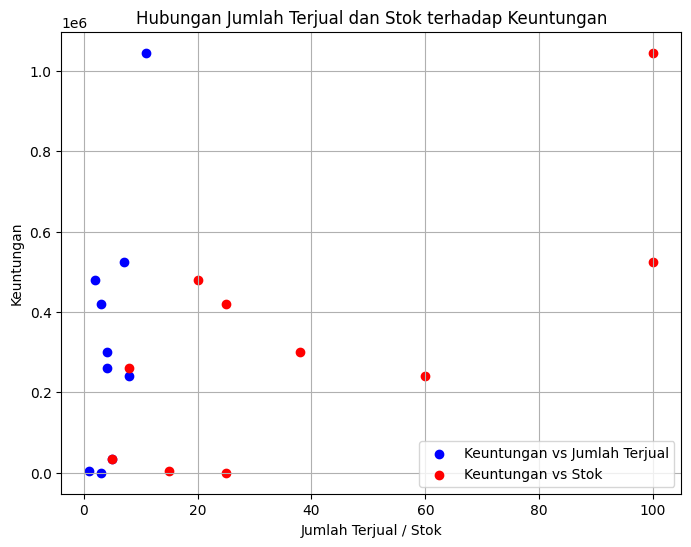

In [155]:
import matplotlib.pyplot as plt

# Membuat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Jumlah Terjual'], df['Keuntungan'], color='blue', label='Keuntungan vs Jumlah Terjual')
plt.scatter(df['Stok'], df['Keuntungan'], color='red', label='Keuntungan vs Stok')

# Menambahkan label dan judul
plt.xlabel('Jumlah Terjual / Stok')
plt.ylabel('Keuntungan')
plt.title('Hubungan Jumlah Terjual dan Stok terhadap Keuntungan')
plt.legend()
plt.grid(True)
plt.show()
